In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


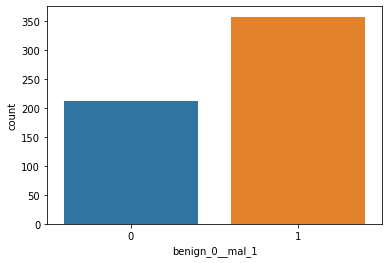

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

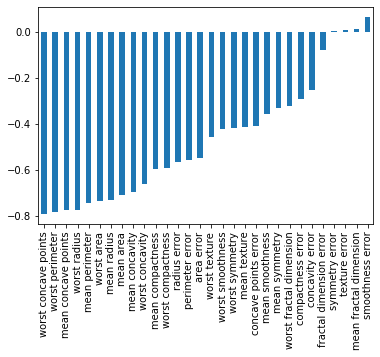

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

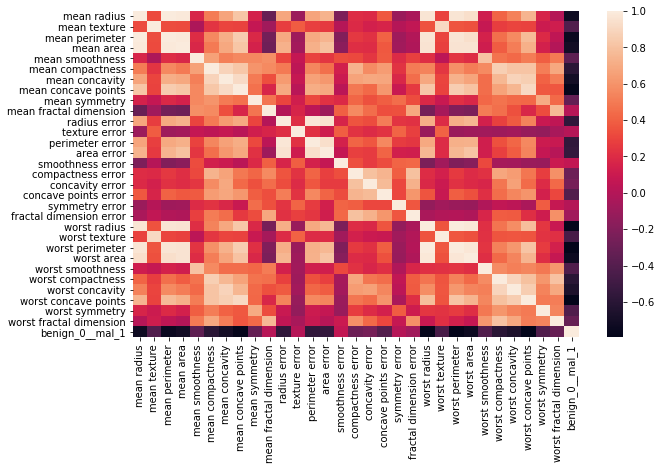

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values

In [13]:
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6895 - val_loss: 0.6637
Epoch 2/600
426/426 [==============================] - 0s 157us/sample - loss: 0.6504 - val_loss: 0.6286
Epoch 3/600
426/426 [==============================] - 0s 163us/sample - loss: 0.6137 - val_loss: 0.5905
Epoch 4/600
426/426 [==============================] - 0s 151us/sample - loss: 0.5742 - val_loss: 0.5464
Epoch 5/600
426/426 [==============================] - 0s 184us/sample - loss: 0.5278 - val_loss: 0.4985
Epoch 6/600
426/426 [==============================] - 0s 178us/sample - loss: 0.4795 - val_loss: 0.4487
Epoch 7/600
426/426 [==============================] - 0s 177us/sample - loss: 0.4303 - val_loss: 0.3990
Epoch 8/600
426/426 [==============================] - 0s 183us/sample - loss: 0.3836 - val_loss: 0.3532
Epoch 9/600
426/426 [==============================] - 0s 155us/sample - loss: 0.3442 - val_loss: 0.3173
Epoch 10/60

426/426 [==============================] - 0s 167us/sample - loss: 0.0519 - val_loss: 0.1095
Epoch 78/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0517 - val_loss: 0.1142
Epoch 79/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0509 - val_loss: 0.1162
Epoch 80/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0518 - val_loss: 0.1095
Epoch 81/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0536 - val_loss: 0.1192
Epoch 82/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0553 - val_loss: 0.1153
Epoch 83/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0681 - val_loss: 0.1106
Epoch 84/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0546 - val_loss: 0.1165
Epoch 85/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0505 - val_loss: 0.1154
Epoch 86/600
426/426 [==============================] - 0s 

Epoch 154/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0388 - val_loss: 0.1274
Epoch 155/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0528 - val_loss: 0.1375
Epoch 156/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0568 - val_loss: 0.1290
Epoch 157/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0412 - val_loss: 0.1376
Epoch 158/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0415 - val_loss: 0.1303
Epoch 159/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0372 - val_loss: 0.1372
Epoch 160/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0426 - val_loss: 0.1418
Epoch 161/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0448 - val_loss: 0.1254
Epoch 162/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0469 - val_loss: 0.1349
Epoch 163/600
426/426 [==============

426/426 [==============================] - 0s 158us/sample - loss: 0.0247 - val_loss: 0.1588
Epoch 231/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0323 - val_loss: 0.1416
Epoch 232/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0345 - val_loss: 0.1832
Epoch 233/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0284 - val_loss: 0.1491
Epoch 234/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0260 - val_loss: 0.1556
Epoch 235/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0244 - val_loss: 0.1515
Epoch 236/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0245 - val_loss: 0.1643
Epoch 237/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0240 - val_loss: 0.1445
Epoch 238/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0284 - val_loss: 0.1612
Epoch 239/600
426/426 [============================

426/426 [==============================] - 0s 162us/sample - loss: 0.0171 - val_loss: 0.1719
Epoch 307/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0161 - val_loss: 0.1886
Epoch 308/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0161 - val_loss: 0.1813
Epoch 309/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0152 - val_loss: 0.1785
Epoch 310/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0152 - val_loss: 0.1843
Epoch 311/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0168 - val_loss: 0.1938
Epoch 312/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0152 - val_loss: 0.1781
Epoch 313/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0155 - val_loss: 0.1813
Epoch 314/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0159 - val_loss: 0.1890
Epoch 315/600
426/426 [============================

426/426 [==============================] - 0s 169us/sample - loss: 0.0096 - val_loss: 0.2153
Epoch 383/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0101 - val_loss: 0.2161
Epoch 384/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0103 - val_loss: 0.2006
Epoch 385/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0108 - val_loss: 0.2244
Epoch 386/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0098 - val_loss: 0.2144
Epoch 387/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0095 - val_loss: 0.2264
Epoch 388/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0104 - val_loss: 0.2086
Epoch 389/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0099 - val_loss: 0.2146
Epoch 390/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0106 - val_loss: 0.1984
Epoch 391/600
426/426 [============================

426/426 [==============================] - 0s 154us/sample - loss: 0.0062 - val_loss: 0.2543
Epoch 459/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0060 - val_loss: 0.2411
Epoch 460/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0063 - val_loss: 0.2389
Epoch 461/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0071 - val_loss: 0.3033
Epoch 462/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0074 - val_loss: 0.2254
Epoch 463/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0063 - val_loss: 0.2527
Epoch 464/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0061 - val_loss: 0.2556
Epoch 465/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0053 - val_loss: 0.2335
Epoch 466/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0078 - val_loss: 0.2902
Epoch 467/600
426/426 [============================

426/426 [==============================] - 0s 151us/sample - loss: 0.0034 - val_loss: 0.2809
Epoch 535/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0032 - val_loss: 0.2818
Epoch 536/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0031 - val_loss: 0.2844
Epoch 537/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0030 - val_loss: 0.2862
Epoch 538/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0034 - val_loss: 0.3001
Epoch 539/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0034 - val_loss: 0.2945
Epoch 540/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0030 - val_loss: 0.2896
Epoch 541/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0032 - val_loss: 0.3025
Epoch 542/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0029 - val_loss: 0.2696
Epoch 543/600
426/426 [============================

In [26]:
losses = pd.DataFrame(model.history.history)

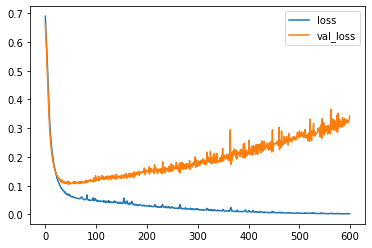

In [27]:
losses.plot()

In [28]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [31]:
early_stop = EarlyStopping(monitor='val_loss',mode="min", verbose=1,patience=25)

In [32]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6751 - val_loss: 0.6564
Epoch 2/600
426/426 [==============================] - 0s 158us/sample - loss: 0.6405 - val_loss: 0.6223
Epoch 3/600
426/426 [==============================] - 0s 163us/sample - loss: 0.5975 - val_loss: 0.5719
Epoch 4/600
426/426 [==============================] - 0s 183us/sample - loss: 0.5487 - val_loss: 0.5232
Epoch 5/600
426/426 [==============================] - 0s 164us/sample - loss: 0.5019 - val_loss: 0.4725
Epoch 6/600
426/426 [==============================] - 0s 164us/sample - loss: 0.4522 - val_loss: 0.4248
Epoch 7/600
426/426 [==============================] - 0s 176us/sample - loss: 0.3969 - val_loss: 0.3687
Epoch 8/600
426/426 [==============================] - 0s 161us/sample - loss: 0.3467 - val_loss: 0.3249
Epoch 9/600
426/426 [==============================] - 0s 159us/sample - loss: 0.3069 - val_loss: 0.2885
Epoch 10/60

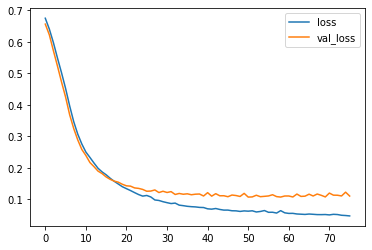

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.7051 - val_loss: 0.6786
Epoch 2/600
426/426 [==============================] - 0s 188us/sample - loss: 0.6829 - val_loss: 0.6577
Epoch 3/600
426/426 [==============================] - 0s 201us/sample - loss: 0.6571 - val_loss: 0.6373
Epoch 4/600
426/426 [==============================] - 0s 192us/sample - loss: 0.6539 - val_loss: 0.6193
Epoch 5/600
426/426 [==============================] - 0s 195us/sample - loss: 0.6300 - val_loss: 0.6013
Epoch 6/600
426/426 [==============================] - 0s 233us/sample - loss: 0.6064 - val_loss: 0.5817
Epoch 7/600
426/426 [==============================] - 0s 181us/sample - loss: 0.5995 - val_loss: 0.5580
Epoch 8/600
426/426 [==============================] - 0s 193us/sample - loss: 0.5660 - val_loss: 0.5349
Epoch 9/600
426/426 [==============================] - 0s 201us/sample - loss: 0.5596 - val_loss: 0.5030
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 199us/sample - loss: 0.1266 - val_loss: 0.1054
Epoch 79/600
426/426 [==============================] - 0s 179us/sample - loss: 0.1423 - val_loss: 0.1077
Epoch 80/600
426/426 [==============================] - 0s 197us/sample - loss: 0.1228 - val_loss: 0.1197
Epoch 81/600
426/426 [==============================] - 0s 245us/sample - loss: 0.1244 - val_loss: 0.1007
Epoch 82/600
426/426 [==============================] - 0s 192us/sample - loss: 0.1278 - val_loss: 0.1000
Epoch 83/600
426/426 [==============================] - 0s 171us/sample - loss: 0.1156 - val_loss: 0.1056
Epoch 84/600
426/426 [==============================] - 0s 169us/sample - loss: 0.1325 - val_loss: 0.1022
Epoch 85/600
426/426 [==============================] - 0s 172us/sample - loss: 0.1113 - val_loss: 0.0959
Epoch 86/600
426/426 [==============================] - 0s 187us/sample - loss: 0.1243 - val_loss: 0.0961
Epoch 87/600
426/426 [========================

In [36]:
model_loss=pd.DataFrame(model.history.history)

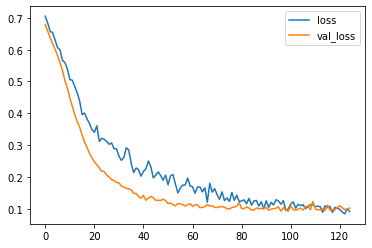

In [37]:
model_loss.plot()

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [42]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
